### Characterize signals moving around the boundaries

Runs exp06/01febTS and  exp11/01febTS with smooth bathymetry

In [2]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

from datetime import datetime
import time

In [7]:
outdir = '/data/SO2/sio-kramosmusalem/exp11_512x612x100_smooth_SVB/01_febTS_1000x/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp11_512x612x100_smooth/01_febTS_1000x/'
iters = np.arange(40,23040,40)
levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], 
                     levels=levels, iters=iters, delta_t=30)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], 
                      levels=levels, iters=iters, delta_t=30)

In [33]:
outdir3 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir4 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'
iters2 = np.arange(20,11520,20)
levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds3 = open_mdsdataset(outdir3, prefix=['eta','dynVars'], 
                     levels=levels, iters=iters2, delta_t=60)
ds4 = open_mdsdataset(outdir4, prefix=['eta','dynVars'], 
                      levels=levels, iters=iters2, delta_t=60)

In [9]:
nx = 576
ny = 612
nz = 100
depthSVB = ds.Depth[:]
depth = ds2.Depth[:]

LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360

Z = ds['Z'][:]
Zl = ds['Zl'][:]

# No bay centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)

# Bay centers mask
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)
dep_maskedSVB = np.ma.masked_values(depthSVB,0)
mask_depSVB = np.ma.getmask(dep_maskedSVB)

times = (iters * 1200 / 40) /3600 # in hrs  

In [34]:
nx = 576
ny = 612
nz = 100
depthSVBog = ds3.Depth[:]
depthog = ds4.Depth[:]

LATog = ds3['YC'][:]
LONog = ds3['XC'][:]-360
latog = ds3.YC[:,0].data
lonog = ds3.XC[0,:].data-360

Zog = ds3['Z'][:]
Zlog = ds3['Zl'][:]

# No bay centers mask
hFacCog = ds4['hFacC'][:]
hfacog = np.ma.masked_values(hFacCog, 0)
maskog = np.ma.getmask(hfacog)
dep_maskedog = np.ma.masked_values(depthog,0)
mask_depog = np.ma.getmask(dep_maskedog)

# Bay centers mask
hFacCSVBog = ds3['hFacC'][:]
hfacSVBog = np.ma.masked_values(hFacCSVBog, 0)
maskSVBog = np.ma.getmask(hfacSVBog)
dep_maskedSVBog = np.ma.masked_values(depthSVBog,0)
mask_depSVBog = np.ma.getmask(dep_maskedSVBog)

timesog = (iters2 * 600 / 10) /3600 # in hrs  

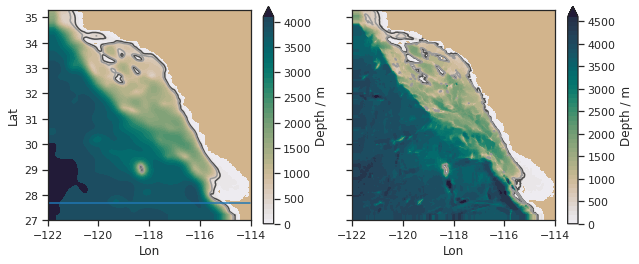

In [35]:
sns.set_style('ticks')
sns.set_context('notebook')
fig, (ax,ax2) = plt.subplots(1,2,figsize=(10,4), sharey=True, sharex=True)
ax.set_facecolor('tan')
ax2.set_facecolor('tan')

pc = ax.contourf(LON,LAT,dep_maskedSVB,50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, ax=ax, extend='max',label='Depth / m')
cn = ax.contour(LON,LAT,depthSVB, colors=['0.3','0.6'], 
                levels=[250,500])

pc2 = ax2.contourf(LONog,LATog,dep_maskedSVBog,50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb2 = plt.colorbar(pc2, ax=ax2, extend='max',label='Depth / m')
cn2 = ax2.contour(LONog,LATog,depthSVBog, colors=['0.3','0.6'], 
                levels=[250,500])

ax.plot(LON[50,:],LAT[50,:])
ax.set_xlabel('Lon')
ax2.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(238-360, 246-360)
ax.set_ylim(27,35.3)
ax.set_aspect(1)
ax2.set_xlim(238-360, 246-360)
ax2.set_ylim(27,35.3)
ax2.set_aspect(1)

### Hovmollërs at W and S boundaries

Text(0.5, 1.0, 'W bdy original')

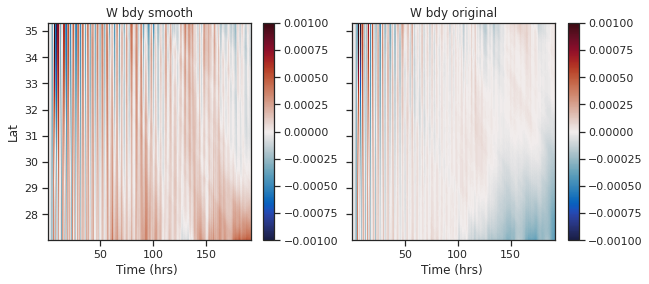

In [40]:
sns.set_style('ticks')
sns.set_context('notebook')
fig, (ax,ax2) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(10,4))

pc = ax.pcolormesh(times,LAT[:,0],np.transpose(ds.ETAN[:,:,1].data-ds2.ETAN[:,:,1].data), 
                   cmap=cmo.cm.balance,
                   vmin = -0.001,
                   vmax = 0.001)
plt.colorbar(pc, ax=ax)

pc2 = ax2.pcolormesh(timesog,LATog[:,0],np.transpose(ds3.ETAN[:,:,1].data-ds4.ETAN[:,:,1].data), 
                   cmap=cmo.cm.balance,
                   vmin = -0.001,
                   vmax = 0.001)
plt.colorbar(pc2, ax=ax2)


ax.set_ylabel('Lat')
ax.set_xlabel('Time (hrs) ')
ax2.set_xlabel('Time (hrs) ')
ax.set_title('W bdy smooth')
ax2.set_title('W bdy original')

Text(0.5, 1.0, 'S bdy original')

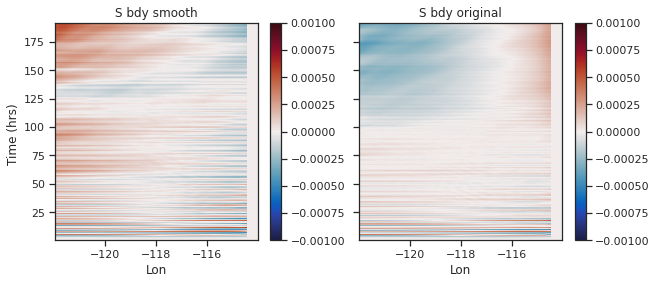

In [42]:
sns.set_style('ticks')
sns.set_context('notebook')
fig, (ax,ax2) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(10,4))

pc = ax.pcolormesh(LON[1,:],times,ds.ETAN[:,1,:].data-ds2.ETAN[:,1,:].data, 
                   cmap=cmo.cm.balance,
                   vmin = -0.001,
                   vmax = 0.001)
plt.colorbar(pc, ax=ax)

pc2 = ax2.pcolormesh(LONog[1,:],timesog,ds3.ETAN[:,1,:].data-ds4.ETAN[:,1,:].data, 
                   cmap=cmo.cm.balance,
                   vmin = -0.001,
                   vmax = 0.001)
plt.colorbar(pc2, ax=ax2)

ax.set_xlabel('Lon')
ax2.set_xlabel('Lon')
ax.set_ylabel('Time (hrs) ')
ax.set_title('S bdy smooth')
ax2.set_title('S bdy original')


Text(0.5, 1.0, 'S bdy original')

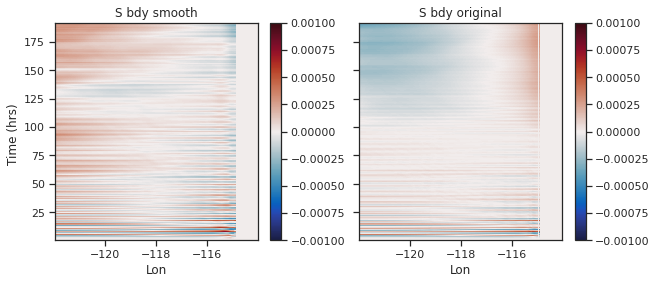

In [45]:
sns.set_style('ticks')
sns.set_context('notebook')
fig, (ax,ax2) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(10,4))

pc = ax.pcolormesh(LON[50,:],times,ds.ETAN[:,50,:].data-ds2.ETAN[:,50,:].data, 
                   cmap=cmo.cm.balance,
                   vmin = -0.001,
                   vmax = 0.001)
plt.colorbar(pc, ax=ax)

pc2 = ax2.pcolormesh(LONog[50,:],timesog,ds3.ETAN[:,50,:].data-ds4.ETAN[:,50,:].data, 
                   cmap=cmo.cm.balance,
                   vmin = -0.001,
                   vmax = 0.001)
plt.colorbar(pc2, ax=ax2)

ax.set_xlabel('Lon')
ax2.set_xlabel('Lon')
ax.set_ylabel('Time (hrs) ')
ax.set_title('S bdy smooth')
ax2.set_title('S bdy original')